In [1]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model, load_model
import seaborn as sns
import datetime
import os.path
import datetime
from importlib import reload

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [111]:
# Import self-made modules
from utils import *
from autoencoder import AutoEncoder

In [122]:
# Reload libraries when changes have been made to them
%reload_ext autoreload
%autoreload 2

In [4]:
# Set file path constants
DATA_FILE_PATH = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/'
DIAGRAM_FILE_PATH = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/'

In [5]:
# Set parameters
WIN_SIZE = 20
SENSORS = ['back_angle', 'left_angle', 'right_angle']
no_feats = len(SENSORS)

In [79]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-patient-shaved.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

In [11]:
# Retrieve test data for plotting and place with pd dataframe
patient_file_path = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/patient/patient_data.csv'
dataframe = pd.read_csv(patient_file_path, parse_dates=['datetime'])
df = dataframe.loc[:,SENSORS]
df.loc[:,'Date'] = pd.to_datetime(dataframe.loc[:,'datetime'])

df.dtypes

back_angle            float64
left_angle            float64
right_angle           float64
Date           datetime64[ns]
dtype: object

# Sect 4.1.1 - Compression factor 0.25 -> 0.5 -> 0.75

In [12]:
compress = 0.25
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_one
# units_two = int(units_one * compress)
# print(f"1st layer units: {units_one}, 2nd layer units: {units_two}")

15

In [13]:
quart_time_code = '185000_0428'
quart_model_file = f'{quart_time_code}-model.h5'
quart_model_file

'185000_0428-model.h5'

Checking for 185000_0428-model.h5

Single layer model built
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15)                1140      
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 20, 15)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 15)            1860      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 15)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 20, 3)             48        
Total params: 3,048
Trainable params: 3,048
Non-trainable para

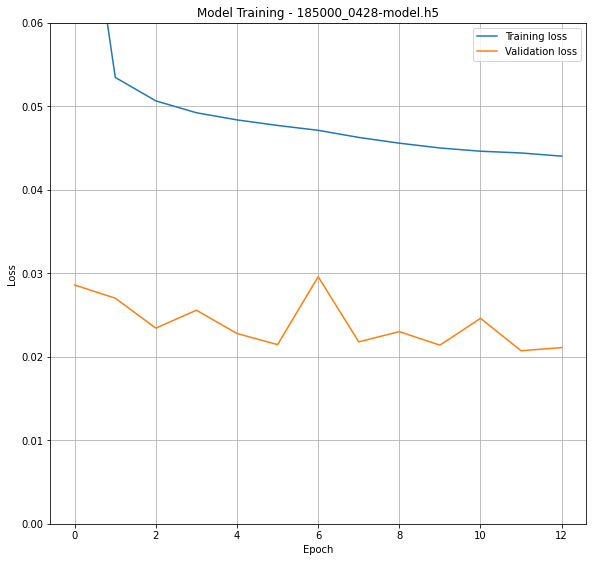

In [14]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
quart = AutoEncoder(units_one, None, trainX, quart_model_file, callback, DIAGRAM_FILE_PATH)

Saved: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/training-Single Layer - 0.25 Compression Factor.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

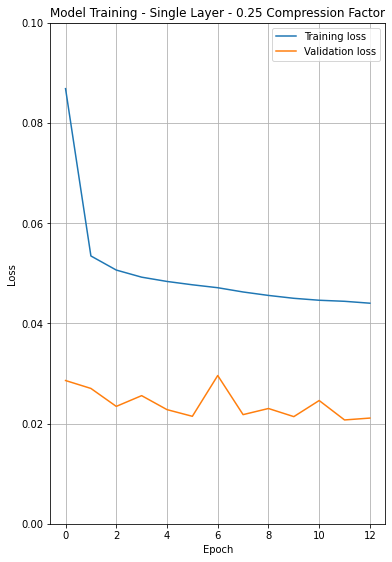

In [127]:
history_plot_and_save(quart.history, (0,0.1),'Single Layer - 0.25 Compression Factor', DIAGRAM_FILE_PATH, True)

In [15]:
compress = 0.5
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_one

30

In [16]:
half_time_code = '190000_0428'
half_model_file = f'{half_time_code}-model.h5'
half_model_file

'190000_0428-model.h5'

Checking for 190000_0428-model.h5

Single layer model built
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30)                4080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 20, 30)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 30)            7320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 30)            0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 3)             93        
Total params: 11,493
Trainable params: 11,493
Non-trainable 

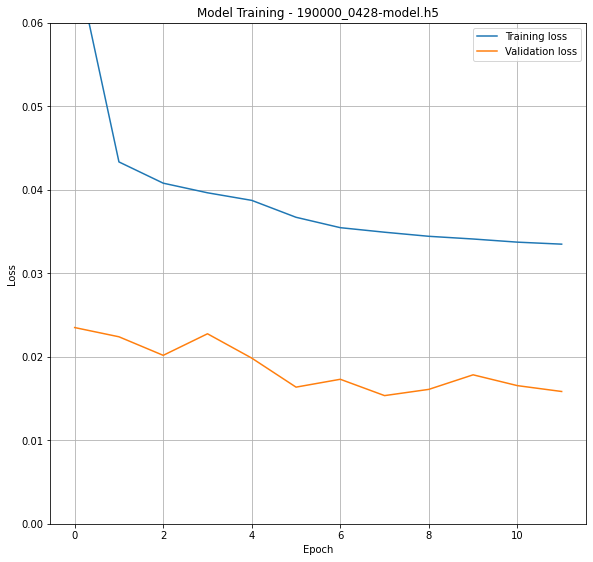

In [17]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
half = AutoEncoder(units_one, None, trainX, half_model_file, callback, DIAGRAM_FILE_PATH)

Saved: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/training-Single Layer - 0.5 Compression Factor.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

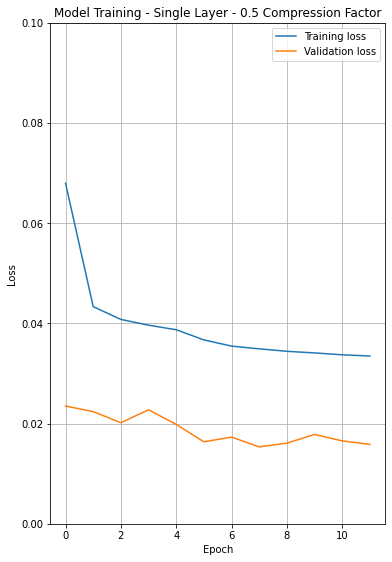

In [128]:
history_plot_and_save(half.history, (0,0.1),'Single Layer - 0.5 Compression Factor', DIAGRAM_FILE_PATH, True)

In [18]:
compress = 0.75
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_one

45

In [19]:
threequart_time_code = '192000_0428'
threequart_model_file = f'{threequart_time_code}-model.h5'
threequart_model_file

'192000_0428-model.h5'

Checking for 192000_0428-model.h5

Single layer model built
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 45)                8820      
_________________________________________________________________
dropout_4 (Dropout)          (None, 45)                0         
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 20, 45)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 20, 45)            16380     
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 45)            0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 20, 3)             138       
Total params: 25,338
Trainable params: 25,338
Non-trainable 

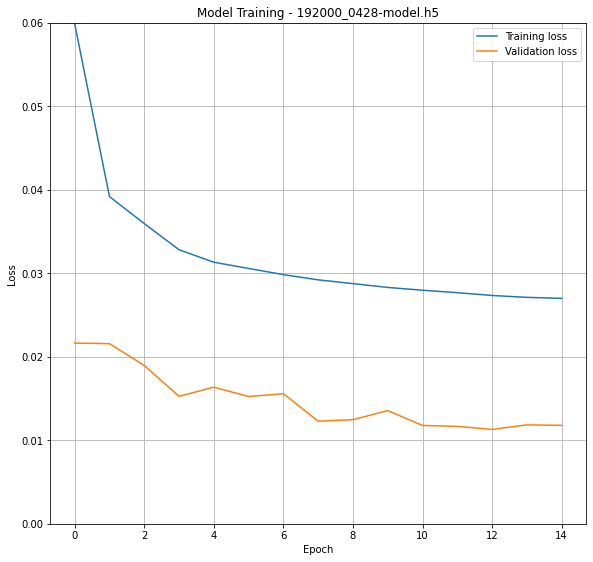

In [20]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
threequart = AutoEncoder(units_one, None, trainX, threequart_model_file, callback, DIAGRAM_FILE_PATH)

Saved: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/training-Single Layer - 0.75 Compression Factor.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

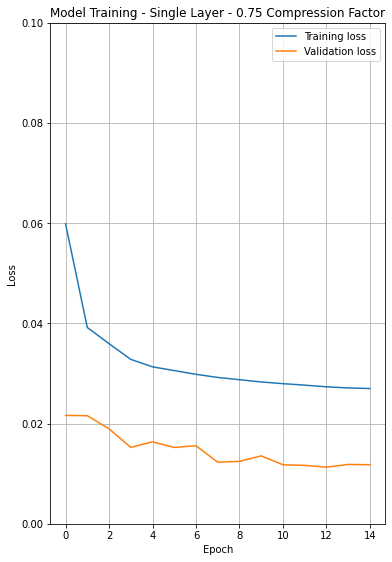

In [130]:
history_plot_and_save(threequart.history, (0,0.1),'Single Layer - 0.75 Compression Factor', DIAGRAM_FILE_PATH, True)

# Sect 4.1.2 - Window Size

In [21]:
# Set parameters
WIN_SIZE = 60
SENSORS = ['back_angle', 'left_angle', 'right_angle']
no_feats = len(SENSORS)

In [23]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-patient-shaved.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (38127, 60, 3)


In [24]:
compress = 0.25
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_one

45

In [25]:
sixty_time_code = '192500_0428'
sixty_model_file = f'{sixty_time_code}-model.h5'
sixty_model_file

'192500_0428-model.h5'

Checking for 192500_0428-model.h5

Single layer model built
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 45)                8820      
_________________________________________________________________
dropout_6 (Dropout)          (None, 45)                0         
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 60, 45)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 45)            16380     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 45)            0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 60, 3)             138       
Total params: 25,338
Trainable params: 25,338
Non-trainable 

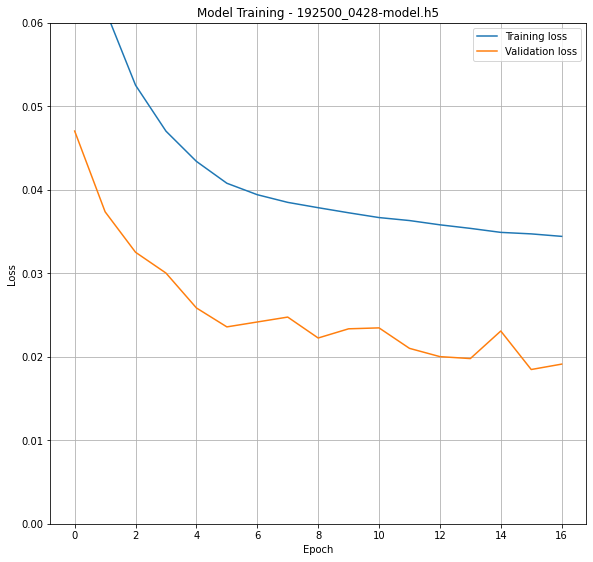

In [26]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
sixty = AutoEncoder(units_one, None, trainX, sixty_model_file, callback, DIAGRAM_FILE_PATH)

In [46]:
# Set parameters
WIN_SIZE = 100
SENSORS = ['back_angle', 'left_angle', 'right_angle']
no_feats = len(SENSORS)

In [47]:
train_data_type = 'patient-shaved'

In [48]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (38087, 100, 3)


In [49]:
compress = 0.25
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_one

75

In [50]:
hund_time_code = '193000_0428'
hund_model_file = f'{hund_time_code}-model.h5'
hund_model_file

'193000_0428-model.h5'

Checking for 193000_0428-model.h5

Single layer model built
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 75)                23700     
_________________________________________________________________
dropout_8 (Dropout)          (None, 75)                0         
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 100, 75)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 75)           45300     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 75)           0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 100, 3)            228       
Total params: 69,228
Trainable params: 69,228
Non-trainable 

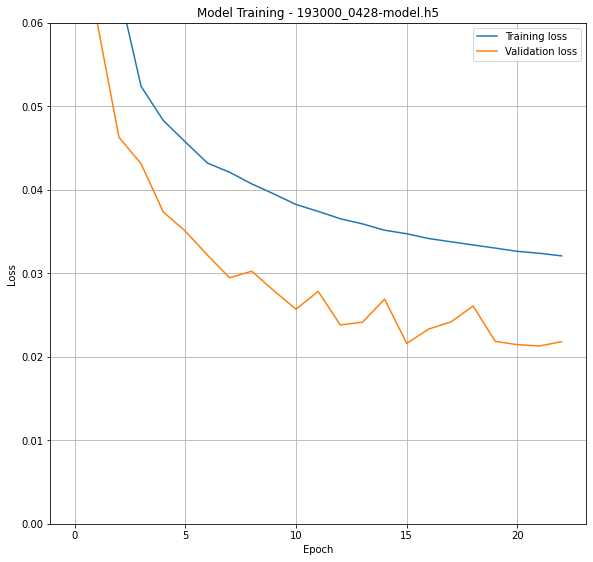

In [51]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
hund = AutoEncoder(units_one, None, trainX, hund_model_file, callback, DIAGRAM_FILE_PATH)

# Sect 4.2.1 - Input Data

In [52]:
# Set parameters
WIN_SIZE = 20
SENSORS = ['back_angle', 'left_angle', 'right_angle']
no_feats = len(SENSORS)

In [53]:
train_data_type = 'augment-shaved'

In [54]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (50189, 20, 3)


In [55]:
compress = 0.25
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_one

15

In [56]:
twenaug_time_code = '200000_0428'
twenaug_model_file = f'{twenaug_time_code}-model.h5'
twenaug_model_file

'200000_0428-model.h5'

Checking for 200000_0428-model.h5

Single layer model built
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 15)                1140      
_________________________________________________________________
dropout_10 (Dropout)         (None, 15)                0         
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 20, 15)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 20, 15)            1860      
_________________________________________________________________
dropout_11 (Dropout)         (None, 20, 15)            0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 20, 3)             48        
Total params: 3,048
Trainable params: 3,048
Non-trainable pa

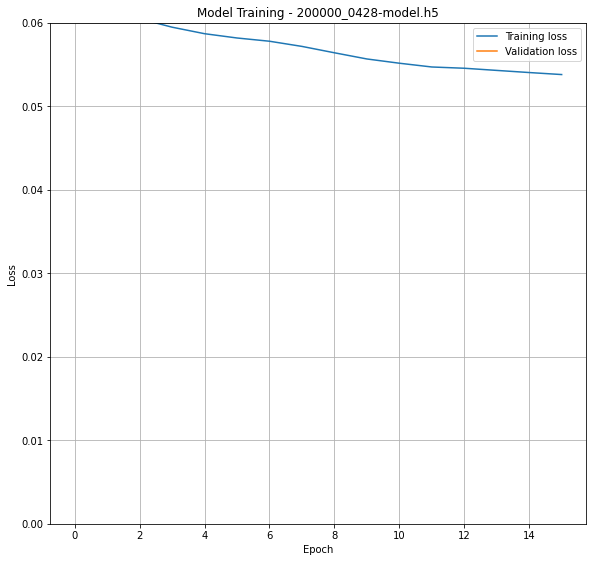

In [57]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
twenaug = AutoEncoder(units_one, None, trainX, twenaug_model_file, callback, DIAGRAM_FILE_PATH)

In [58]:
train_data_type = 'control'

In [59]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (12022, 20, 3)


In [60]:
twencon_time_code = '203000_0428'
twencon_model_file = f'{twencon_time_code}-model.h5'
twencon_model_file

'203000_0428-model.h5'

Checking for 203000_0428-model.h5

Single layer model built
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 15)                1140      
_________________________________________________________________
dropout_12 (Dropout)         (None, 15)                0         
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 20, 15)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 20, 15)            1860      
_________________________________________________________________
dropout_13 (Dropout)         (None, 20, 15)            0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 20, 3)             48        
Total params: 3,048
Trainable params: 3,048
Non-trainable pa

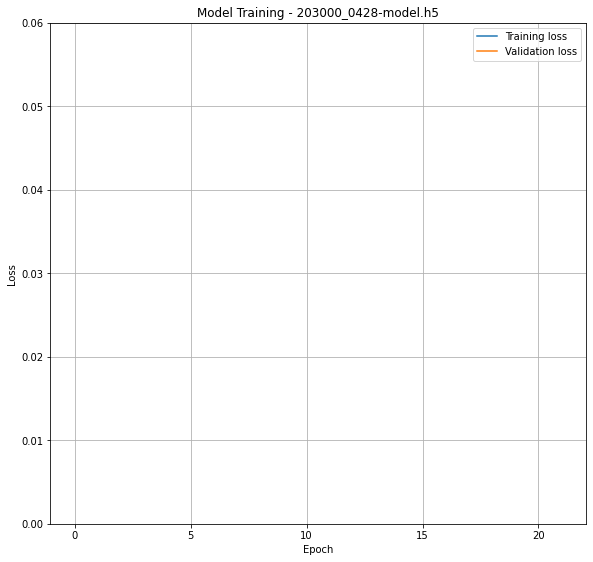

In [61]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
twencon = AutoEncoder(units_one, None, trainX, twencon_model_file, callback, DIAGRAM_FILE_PATH)

In [62]:
# Set parameters
WIN_SIZE = 100
SENSORS = ['back_angle', 'left_angle', 'right_angle']
no_feats = len(SENSORS)

In [63]:
train_data_type = 'augment-shaved'

In [64]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (41955, 100, 3)


In [65]:
compress = 0.25
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_one

75

In [72]:
hundaug_time_code = '204000_0428'
hundaug_model_file = f'{hundaug_time_code}-model.h5'
hundaug_model_file

'204000_0428-model.h5'

Checking for 204000_0428-model.h5

Single layer model built
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 75)                23700     
_________________________________________________________________
dropout_16 (Dropout)         (None, 75)                0         
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 100, 75)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 100, 75)           45300     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100, 75)           0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, 100, 3)            228       
Total params: 69,228
Trainable params: 69,228
Non-trainable 

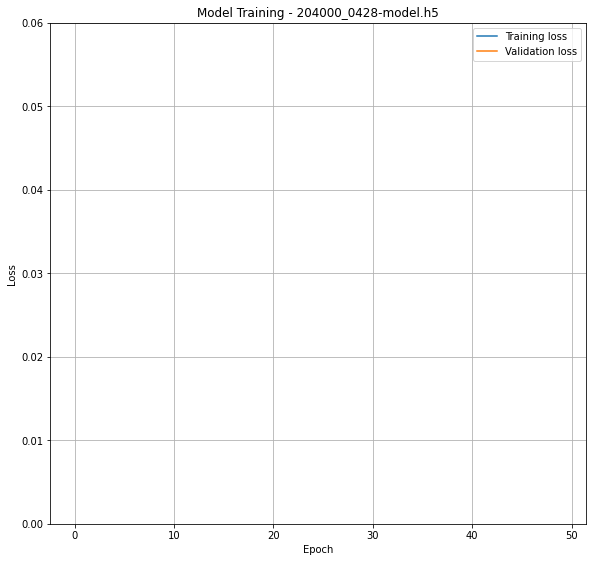

In [73]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
hundaug = AutoEncoder(units_one, None, trainX, hundaug_model_file, callback, DIAGRAM_FILE_PATH)

In [74]:
train_data_type = 'control'

In [69]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (3868, 100, 3)


In [70]:
hundcon_time_code = '210000_0428'
hundcon_model_file = f'{hundcon_time_code}-model.h5'
hundcon_model_file

'210000_0428-model.h5'

Checking for 210000_0428-model.h5

Single layer model built
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 75)                23700     
_________________________________________________________________
dropout_14 (Dropout)         (None, 75)                0         
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 100, 75)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 100, 75)           45300     
_________________________________________________________________
dropout_15 (Dropout)         (None, 100, 75)           0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 100, 3)            228       
Total params: 69,228
Trainable params: 69,228
Non-trainable 

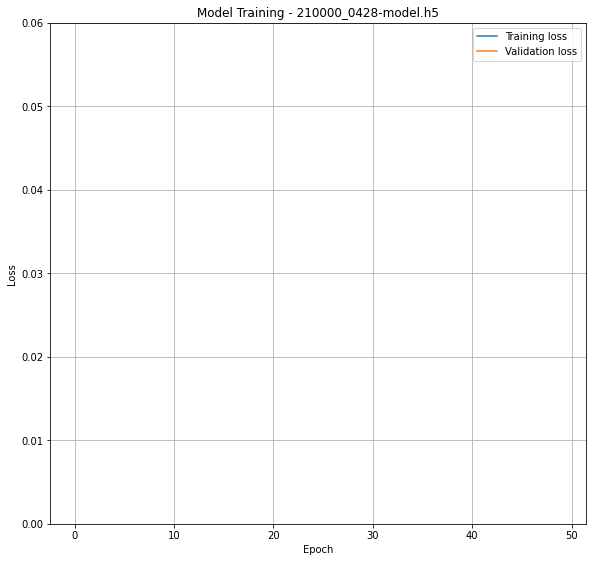

In [71]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
hundcon = AutoEncoder(units_one, None, trainX, hundcon_model_file, callback, DIAGRAM_FILE_PATH)

# INPUT DATA SECTION HAD TO BE REDONE BECAUSE TRAIN/TEST SHOULD BE SEPARATED

In [81]:
# Set parameters
WIN_SIZE = 20
SENSORS = ['back_angle', 'left_angle', 'right_angle']
no_feats = len(SENSORS)

In [82]:
train_data_type = 'patient-train'

In [83]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (30529, 20, 3)


In [84]:
compress = 0.25
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_one

15

In [85]:
twenpat_time_code = '110000_0429'
twenpat_model_file = f'{twenpat_time_code}-model.h5'
twenpat_model_file

'110000_0429-model.h5'

Checking for 110000_0429-model.h5

Single layer model built
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 15)                1140      
_________________________________________________________________
dropout_18 (Dropout)         (None, 15)                0         
_________________________________________________________________
repeat_vector_9 (RepeatVecto (None, 20, 15)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 20, 15)            1860      
_________________________________________________________________
dropout_19 (Dropout)         (None, 20, 15)            0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, 20, 3)             48        
Total params: 3,048
Trainable params: 3,048
Non-trainable pa

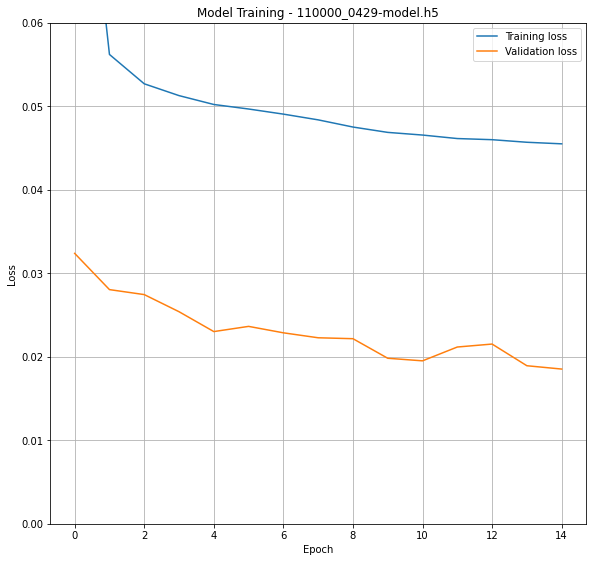

In [86]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
twenpat = AutoEncoder(units_one, None, trainX, twenpat_model_file, callback, DIAGRAM_FILE_PATH)

In [87]:
train_data_type = 'augment-train'

In [88]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (27276, 20, 3)


In [90]:
twenaug_time_code = '111000_0429'
twenaug_model_file = f'{twenaug_time_code}-model.h5'
twenaug_model_file

'111000_0429-model.h5'

Checking for 111000_0429-model.h5

Single layer model built
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 15)                1140      
_________________________________________________________________
dropout_20 (Dropout)         (None, 15)                0         
_________________________________________________________________
repeat_vector_10 (RepeatVect (None, 20, 15)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 20, 15)            1860      
_________________________________________________________________
dropout_21 (Dropout)         (None, 20, 15)            0         
_________________________________________________________________
time_distributed_10 (TimeDis (None, 20, 3)             48        
Total params: 3,048
Trainable params: 3,048
Non-trainable p

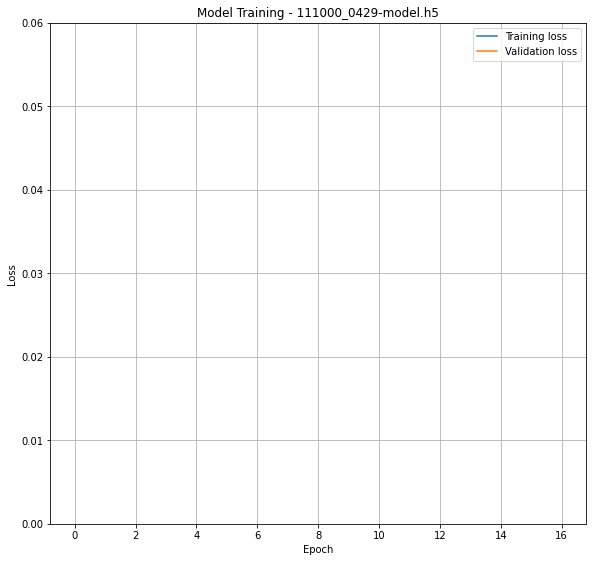

In [91]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
twenaug = AutoEncoder(units_one, None, trainX, twenaug_model_file, callback, DIAGRAM_FILE_PATH)

In [92]:
train_data_type = 'control-train'

In [93]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (12022, 20, 3)


In [94]:
twencon_time_code = '112000_0429'
twencon_model_file = f'{twencon_time_code}-model.h5'
twencon_model_file

'112000_0429-model.h5'

Checking for 112000_0429-model.h5

Single layer model built
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 15)                1140      
_________________________________________________________________
dropout_22 (Dropout)         (None, 15)                0         
_________________________________________________________________
repeat_vector_11 (RepeatVect (None, 20, 15)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 20, 15)            1860      
_________________________________________________________________
dropout_23 (Dropout)         (None, 20, 15)            0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 20, 3)             48        
Total params: 3,048
Trainable params: 3,048
Non-trainable p

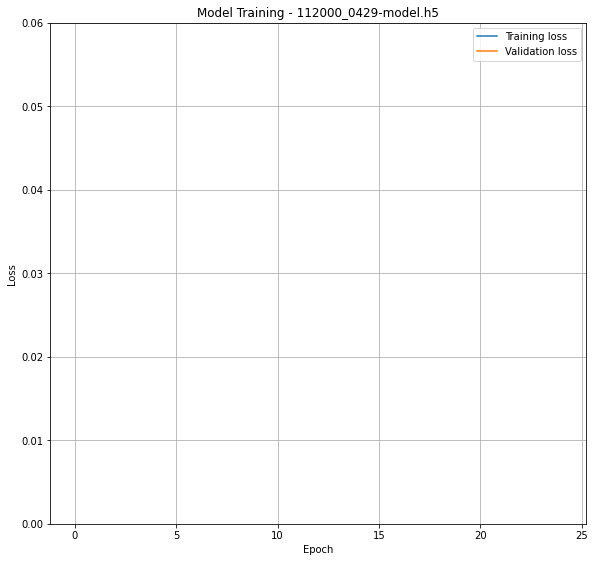

In [95]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
twencon = AutoEncoder(units_one, None, trainX, twencon_model_file, callback, DIAGRAM_FILE_PATH)

In [96]:
# Set parameters
WIN_SIZE = 100
SENSORS = ['back_angle', 'left_angle', 'right_angle']
no_feats = len(SENSORS)

In [97]:
train_data_type = 'patient-train'

In [98]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (30449, 100, 3)


In [99]:
compress = 0.25
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_one

75

In [100]:
hundpat_time_code = '113000_0429'
hundpat_model_file = f'{hundpat_time_code}-model.h5'
hundpat_model_file

'113000_0429-model.h5'

Checking for 113000_0429-model.h5

Single layer model built
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 75)                23700     
_________________________________________________________________
dropout_24 (Dropout)         (None, 75)                0         
_________________________________________________________________
repeat_vector_12 (RepeatVect (None, 100, 75)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 100, 75)           45300     
_________________________________________________________________
dropout_25 (Dropout)         (None, 100, 75)           0         
_________________________________________________________________
time_distributed_12 (TimeDis (None, 100, 3)            228       
Total params: 69,228
Trainable params: 69,228
Non-trainable

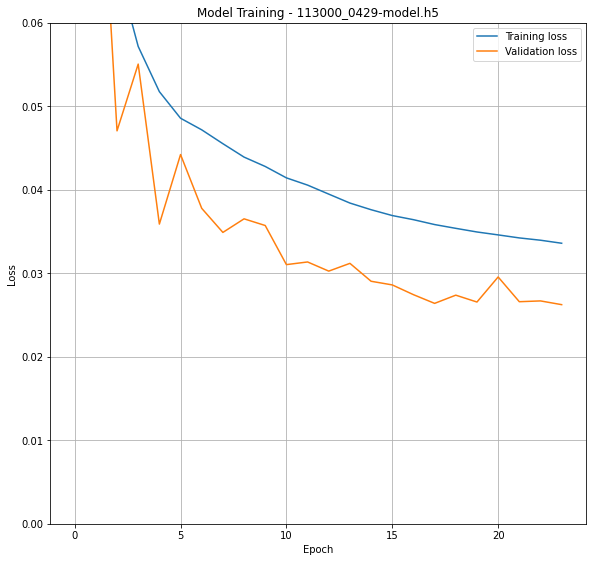

In [101]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
hundpat = AutoEncoder(units_one, None, trainX, hundpat_model_file, callback, DIAGRAM_FILE_PATH)

In [102]:
train_data_type = 'augment-train'

In [103]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (19042, 100, 3)


In [104]:
hundaug_time_code = '114000_0429'
hundaug_model_file = f'{hundaug_time_code}-model.h5'
hundaug_model_file

'114000_0429-model.h5'

Checking for 114000_0429-model.h5

Single layer model built
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 75)                23700     
_________________________________________________________________
dropout_26 (Dropout)         (None, 75)                0         
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 100, 75)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 100, 75)           45300     
_________________________________________________________________
dropout_27 (Dropout)         (None, 100, 75)           0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 100, 3)            228       
Total params: 69,228
Trainable params: 69,228
Non-trainable

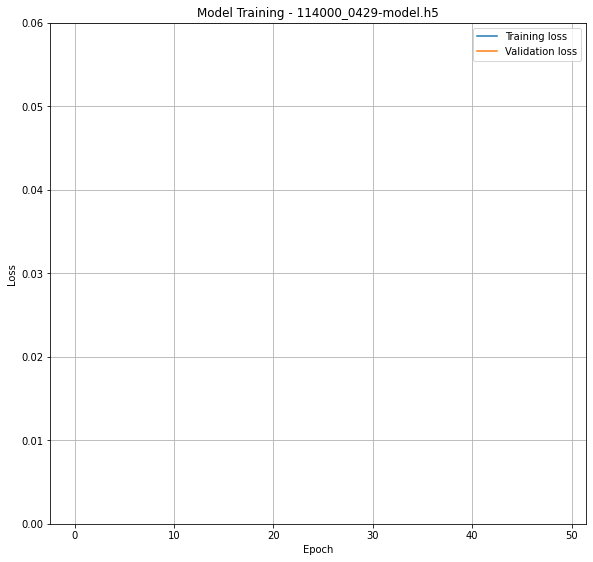

In [114]:
# Fit the model
# callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
hundaug = AutoEncoder(units_one, None, trainX, 3, hundaug_model_file, DIAGRAM_FILE_PATH)

In [115]:
train_data_type = 'control-train'

In [116]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-{train_data_type}.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (3868, 100, 3)


In [117]:
hundcon_time_code = '115000_0429'
hundcon_model_file = f'{hundcon_time_code}-model.h5'
hundcon_model_file

'115000_0429-model.h5'

Checking for 115000_0429-model.h5

Single layer model built
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 75)                23700     
_________________________________________________________________
dropout_28 (Dropout)         (None, 75)                0         
_________________________________________________________________
repeat_vector_14 (RepeatVect (None, 100, 75)           0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 100, 75)           45300     
_________________________________________________________________
dropout_29 (Dropout)         (None, 100, 75)           0         
_________________________________________________________________
time_distributed_14 (TimeDis (None, 100, 3)            228       
Total params: 69,228
Trainable params: 69,228
Non-trainable

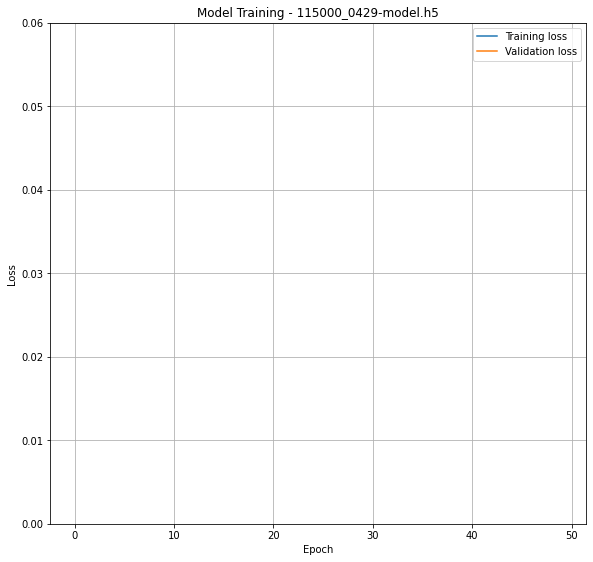

In [119]:
# Fit the model
# callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
hundcon = AutoEncoder(units_one, None, trainX, 3, hundcon_model_file, DIAGRAM_FILE_PATH)